In [ ]:
! pip install wordcloud
import nltk
nltk.download('all')

    100% |████████████████████████████████| 163kB 1.1MB/s ta 0:00:01
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    | 

[nltk_data]    |   Unzipping corpora/pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/ossinova/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.

# Data Visualization

This notebook contains some basic text visualization techniques that may be interesting depending on what kind of data you are looking at. We will use text available in the ```nltk``` library and make the following visualizations:

1. Word cloud
2. Lexical dispersion plot
3. Frequency distribution plot
4. Lexical diversity dispersion plot
5. Word length distribution plot
6. N-gram frequency distribution plot

Let's get started and import some of the python modules that we'll need.

In [2]:
from nltk.corpus import brown
import matplotlib.pyplot as plt
import nltk
from matplotlib import rcParams
import math
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

%matplotlib inline

Let's read in some data using the ```inaugural``` corpus available from ```nltk.corpus```.

In [3]:
from nltk.corpus import inaugural

inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

As you can see, there are quite a lot of inaugural speeches in this corpus. Let's create a dataframe organized by inauguration date, president, and the speech so that we can make some interesting plots.

In [ ]:
speeches = []
for each_file in inaugural.fileids():
    inauguration_date = each_file.split('-')[0]
    president = each_file.split('-')[1].split('.')[0]
    speeches.append([inauguration_date, president, inaugural.raw(each_file)])

In [ ]:
import pandas as pd
df_speeches = pd.DataFrame(speeches, columns = ['inauguration_date', 'president', 'inauguration_speech'])


In [ ]:
df_speeches

_____

## Data Understanding & Basic Pre-Processing

#### Sentence Tokenization

We can use ```sent_tokenize``` to identify each sentence in one of the speeches here. ```sent_tokenize``` uses an instance of ```PunktSentenceTokenizer``` from the ```nltk.tokenize.punkt``` module. 

This instance has already been trained on and works well for many European languages. So it knows what punctuation and characters mark the end of a sentence and the beginning of a new sentence.

In [6]:
from nltk.tokenize import sent_tokenize

obama = inaugural.raw('2009-Obama.txt')
sent_tokenize_list = sent_tokenize(obama)

print('Number of sentences: {}'.format(len(sent_tokenize_list)))

Number of sentences: 110


In [7]:
n = 0
for sent in sent_tokenize_list[0:5]:
    n += 1
    print('\nSentence {}: \n{} '.format(n, sent))


Sentence 1: 
My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. 

Sentence 2: 
I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition. 

Sentence 3: 
Forty-four Americans have now taken the presidential oath. 

Sentence 4: 
The words have been spoken during rising tides of prosperity and the still waters of peace. 

Sentence 5: 
Yet, every so often the oath is taken amidst gathering clouds and raging storms. 


#### Word Tokenization

Now let's try tokenizing into words using ```word_tokenize``` from ```nltk.tokenize``` module

In [8]:
from nltk.tokenize import word_tokenize

word_tokens = word_tokenize(sent_tokenize_list[0])
print('Word tokens in sentence 1: \n{}'.format(word_tokens))

Word tokens in sentence 1: 
['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.']


#### Part of Speech (POS) Tagging

Part-of-speech tagging is one of the most important text analysis tasks used to classify words into their part-of-speech and label them according the tagset which is a collection of tags used for the pos tagging. Part-of-speech tagging also known as word classes or lexical categories.

In [9]:
nltk.pos_tag(word_tokens)

[('My', 'PRP$'),
 ('fellow', 'JJ'),
 ('citizens', 'NNS'),
 (':', ':'),
 ('I', 'PRP'),
 ('stand', 'VBP'),
 ('here', 'RB'),
 ('today', 'NN'),
 ('humbled', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('task', 'NN'),
 ('before', 'IN'),
 ('us', 'PRP'),
 (',', ','),
 ('grateful', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('trust', 'NN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('bestowed', 'VBN'),
 (',', ','),
 ('mindful', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('sacrifices', 'NNS'),
 ('borne', 'VBN'),
 ('by', 'IN'),
 ('our', 'PRP$'),
 ('ancestors', 'NNS'),
 ('.', '.')]

NLTK provides documentation for each tag, which can be queried using the tag, e.g., ```nltk.help.upenn_tagset(‘RB’)```, or a regular expression, e.g., ```nltk.help.upenn_brown_tagset(‘NN.*’)```

In [10]:
nltk.help.upenn_tagset('PRP$')

PRP$: pronoun, possessive
    her his mine my our ours their thy your


#### Stemming and Lemmatization

Stemming and lemmatization are the basic text processing methods for English text. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

NLTK provides several famous stemmers interfaces, such as Porter stemmer, Lancaster Stemmer, Snowball Stemmer and etc. In NLTK, using those stemmers is very simple.

Let's try the __Porter Stemmer__, which is based on The Porter Stemming Algorithm.

In [11]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

for each_word in word_tokens:
    print('{} - {}'.format(each_word, porter_stemmer.stem(each_word)))

My - My
fellow - fellow
citizens - citizen
: - :
I - I
stand - stand
here - here
today - today
humbled - humbl
by - by
the - the
task - task
before - befor
us - us
, - ,
grateful - grate
for - for
the - the
trust - trust
you - you
have - have
bestowed - bestow
, - ,
mindful - mind
of - of
the - the
sacrifices - sacrific
borne - born
by - by
our - our
ancestors - ancestor
. - .


____

## 1. Word cloud

Word clouds are one of the most basic and simple of visualization techniques when looking at text data. It allows you to quickly see word frequency by scaling words according to the number of times they occur in the corpus. 

Let's make a long string out of __all__ of the speeches and see if we see any common words.

In [12]:
text = inaugural.raw()

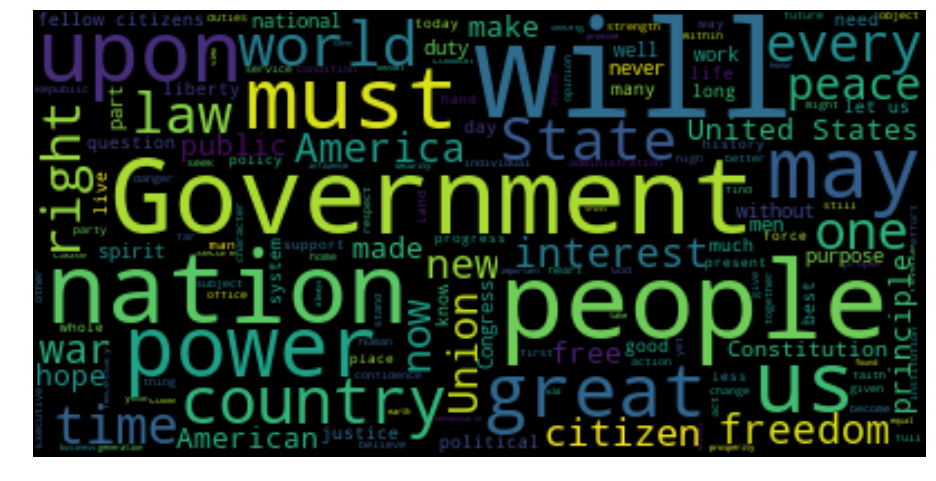

In [13]:
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some words are obviously not very interesting - i.e. will - and there are many words that you would expect of a presidential inaugural speech - i.e. Government, people, country. We can add some stopwords to remove from the plotting in the next step.


Let's see if we see any differences in the words the most recent presidents have used vs. the older presidents.

In [14]:
speeches_pre1900 = df_speeches[df_speeches.inauguration_date.astype(int) < 1900].inauguration_speech.tolist()
speeches_pre1900 = ' '.join(speeches_pre1900)

speeches_post1900 = df_speeches[df_speeches.inauguration_date.astype(int) > 1900].inauguration_speech.tolist()
speeches_post1900 = ' '.join(speeches_post1900)

Let's add any stopwords we want here.

In [15]:
from wordcloud import STOPWORDS
STOPWORDS.add('will')

### Pre-1900 Presidential Inauguration Speech Word Cloud

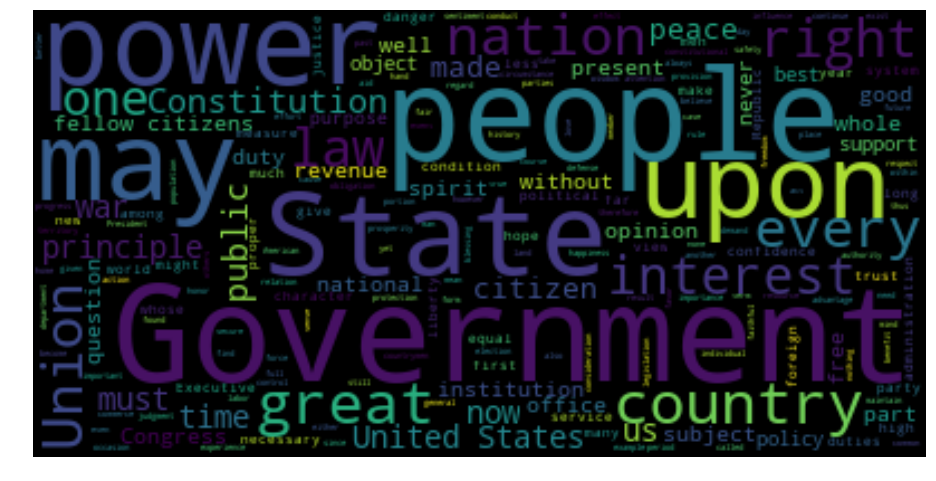

In [16]:
wordcloud = WordCloud(max_font_size=60).generate(speeches_pre1900)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Post-1900 Presidential Inauguration Speech Word Cloud

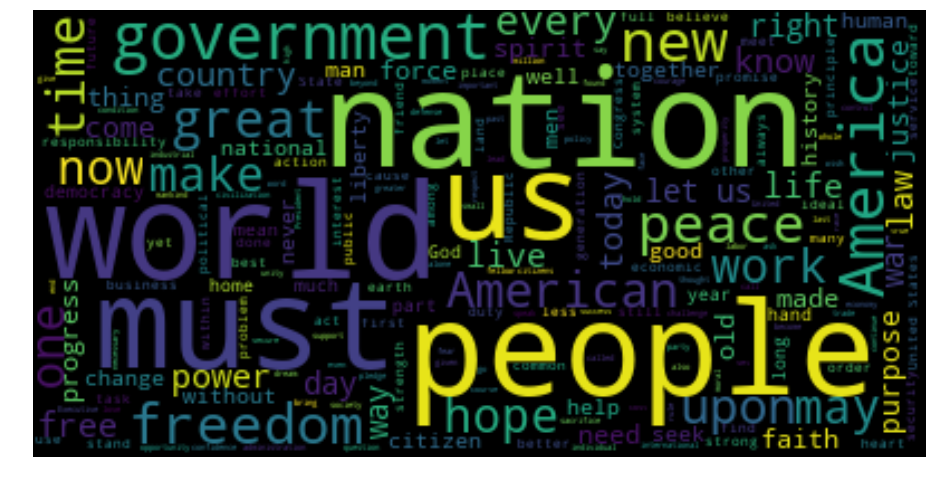

In [17]:
wordcloud = WordCloud(max_font_size=60).generate(speeches_post1900)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

___

## 2. Lexical Dispersion Plot

American presidents through the ages have been focused on freedom, America, people, country, etc. These are consistent themes, but let's see how the words are used in the speeches.

A lexical dispersion plot will show __where__ specific words appeared in the text corpus. The y-axis represents the word. Each word has a strip representing entire text in terms of offset, and a mark on the strip indicates the occurrence of the word at that offset. 

The positional information can indicate the focus of discussion in the text. You might find that some words appear more often at the beginning vs. the end of speeches, while others have a somewhat uniform distribution in the middle. 

In [18]:
from nltk import word_tokenize

def tokenizer(date, president):
    '''
    date - date of inauguration speech
    president - the president to select from the dataframe
    '''
    return word_tokenize(df_speeches[(df_speeches.inauguration_date == str(date)) & 
                                     (df_speeches.president == president)].inauguration_speech.values[0])

### Clinton - 1993 lexical dispersion plot

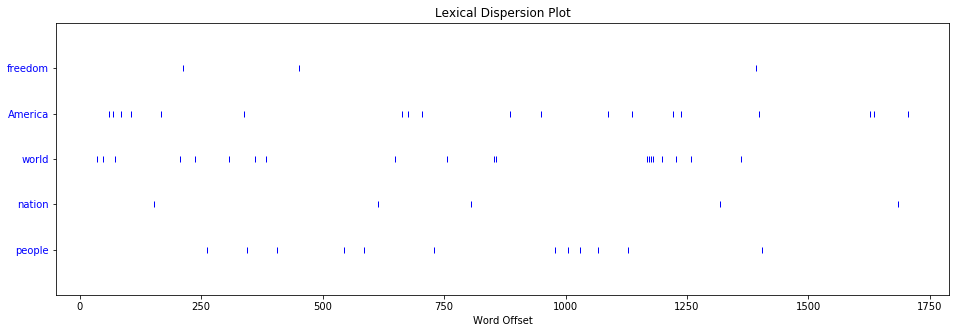

In [19]:
plt.figure(figsize=(16,5))

nltk.Text(tokenizer(1993, 'Clinton')).dispersion_plot(["freedom", "America", "world", "nation", "people"])

### Obama - 2009 lexical dispersion plot

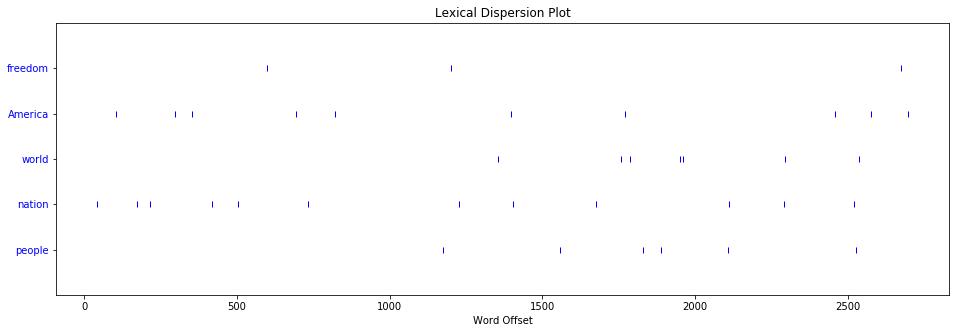

In [20]:
plt.figure(figsize=(16,5))

nltk.Text(tokenizer(2009, 'Obama')).dispersion_plot(["freedom", "America", "world", "nation", "people"])

____

## 3. Frequency Distribution

Now, let's see how frequent different vocabulary is by using a frequency distribution plot. The frequency of the word can help us understand the topic of the corpus. 

Different genre of text can have a different set of frequent words. For example, if we have news corpus, news related to sports may have a different set of frequent words as compared to news related to politics. ```nltk``` has ```FreqDist``` class that helps to create a frequency distribution of the text corpus. The code below will find 5 most and least frequent words.

It will be surprising to see that in least frequent table words belonging to a category of text corpus are more informative compared to the words found in the most frequent table which is the core idea behind TF-IDF algorithm. Most frequent words convey little information about text compared to less frequent words.

We will use the ```brown``` corpus from ```nltk```. More information about the corpus can be found [here].(https://en.wikipedia.org/wiki/Brown_Corpus)

In [21]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

How does the corpus tagged as humor look?

In [22]:
print(' '.join(brown.words(categories='humor')))

It was among these that Hinkle identified a photograph of Barco ! ! For it seems that Barco , fancying himself a ladies' man ( and why not , after seven marriages ? ? ) , had listed himself for Mormon Beard roles at the instigation of his fourth murder victim who had said : `` With your beard , dear , you ought to be in movies '' ! ! Mills secured Barco's photograph from the gentleman in charge , rushed to the Hollywood police station to report the theft , and less than five minutes later , detectives with his picture in hand were on the trail of Cal Barco . On their way , they stopped at every gas station along the main boulevards to question the attendants . Finally , at Ye Olde Gasse Filling Station on Avocado Avenue , they learned that their man , having paused to get oil for his car , had asked about the route to San Diego . They headed in that direction and , at San Juan Capistrano By-the-Sea came upon Barco sitting in the quaint old Spanish Mission Drive-in , eating a hot tamale

Let's look at the most and least frequent words in each of the corpora. Do they make sense?

In [23]:
df_most_freq_words = pd.DataFrame()
df_least_freq_words = pd.DataFrame()

for topic in brown.categories():
    words = [word for word in brown.words(categories=topic) if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    df_most_freq_words[topic] = list([ word.lower() for word, count in freqdist.most_common(5)])
    df_least_freq_words[topic] = list([ word.lower() for word, count in freqdist.most_common()[-5:]])

In [24]:
df_most_freq_words

,adventure,belles_lettres,editorial,fiction,government,hobbies,humor,learned,lore,mystery,news,religion,reviews,romance,science_fiction
0,said,one,would,would,year,one,said,af,one,said,said,god,one,said,would
1,would,would,one,said,states,may,one,one,would,would,would,world,music,would,could
2,back,time,new,one,united,time,would,may,time,one,one,one,first,could,said
3,man,man,american,could,may,two,time,would,may,back,last,may,man,like,one
4,one,could,united,like,would,first,even,two,first,could,two,new,new,one,time


In [25]:
df_least_freq_words

,adventure,belles_lettres,editorial,fiction,government,hobbies,humor,learned,lore,mystery,news,religion,reviews,romance,science_fiction
0,snick,shakes,unfortunate,scraped,load,explore,swift,pickoffs,section,bat,pupils,medium,chemical,forefinger,letting
1,fisted,charge,casts,fringed,cadre,hinterlands,greedy,stator,forbids,mexico,render,sat,degree,burly,blow
2,overhand,miltonic,unjustifiable,epaulets,perception,bride,inside,autonavigator,importation,doris,vitally,ivory,saturation,decked,ten
3,plunge,angels,aura,spic,lengthened,winner,boucle,spinning,willingly,manny,richer,velvet,saturated,expect,fingers
4,insanely,rottosei,falsehood,caps,shadow,sweepstakes,stupefying,unleveled,enslavement,willy,fuller,sadness,exerts,episode,front


The code below will plot frequency distribution for each of the categories. How do they differ from each other?

adventure


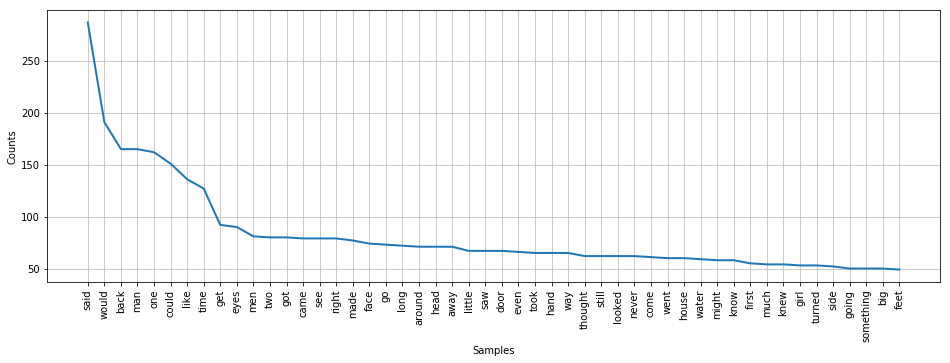

belles_lettres


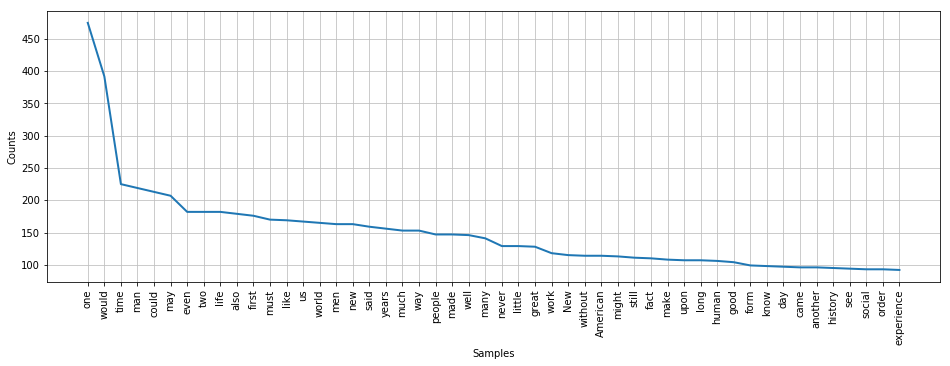

editorial


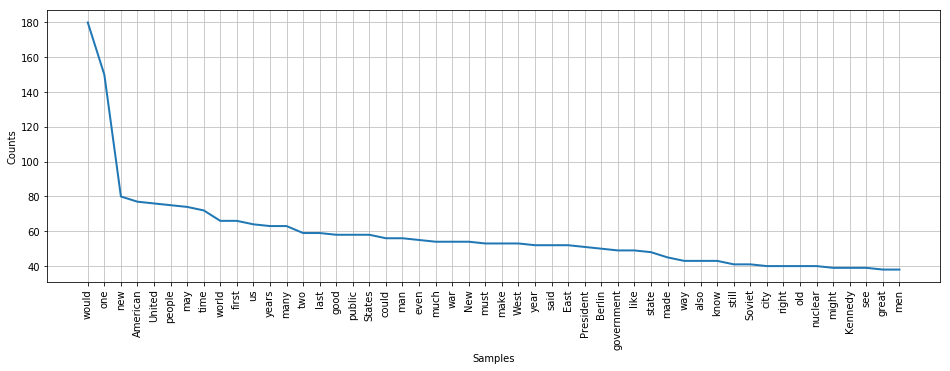

fiction


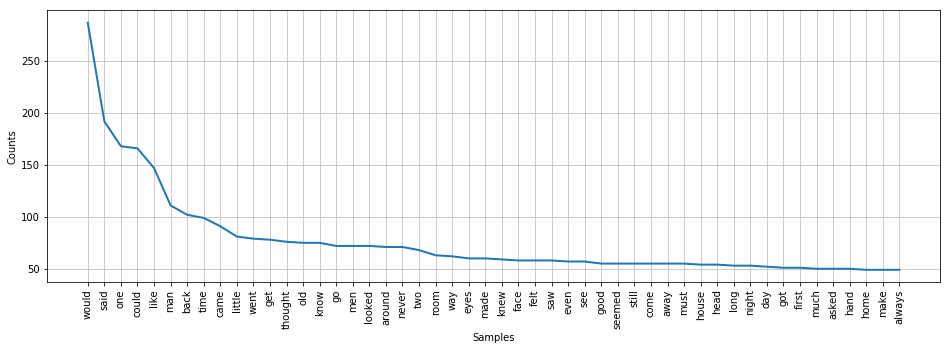

government


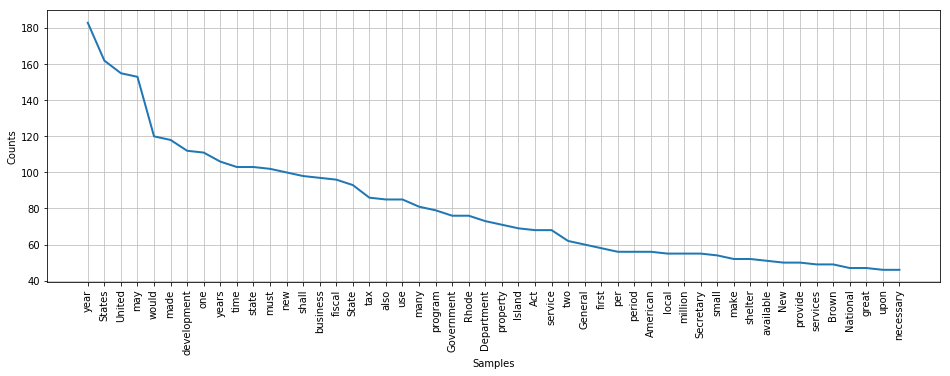

hobbies


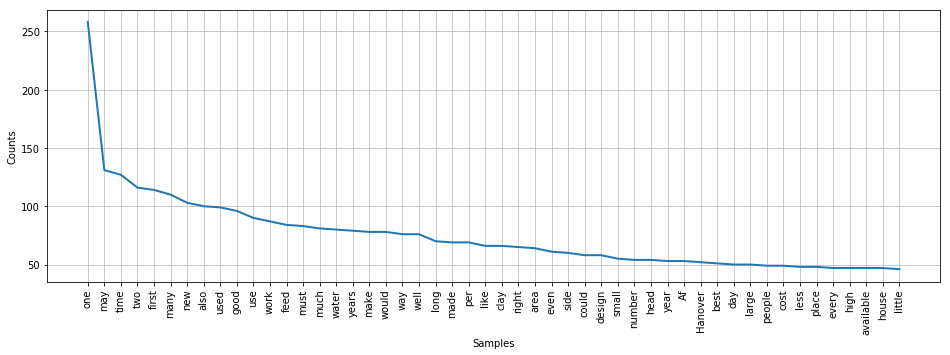

humor


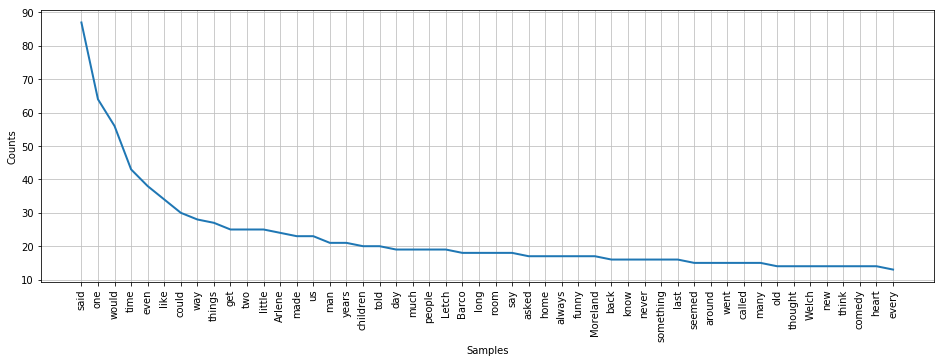

learned


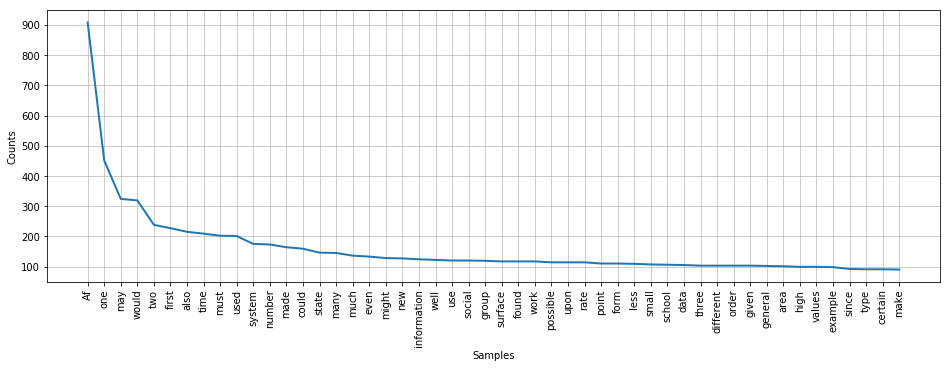

lore


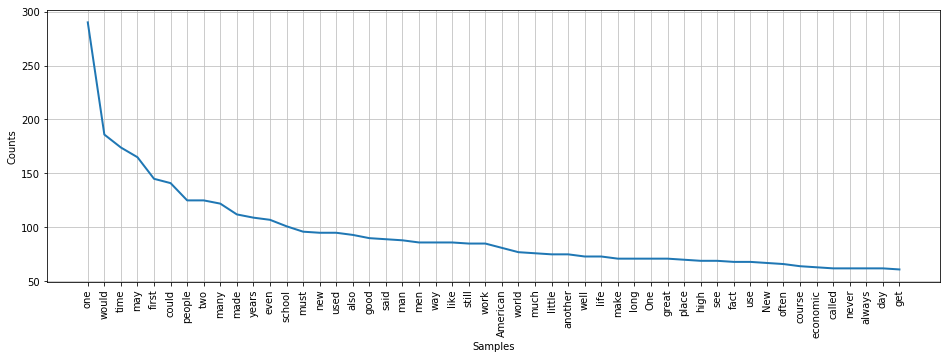

mystery


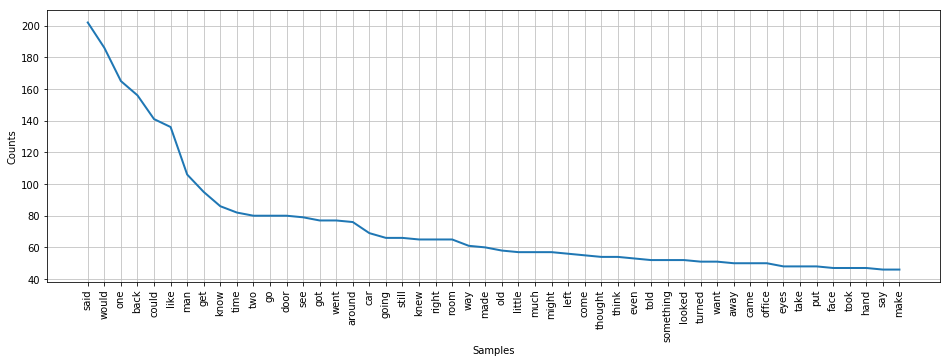

news


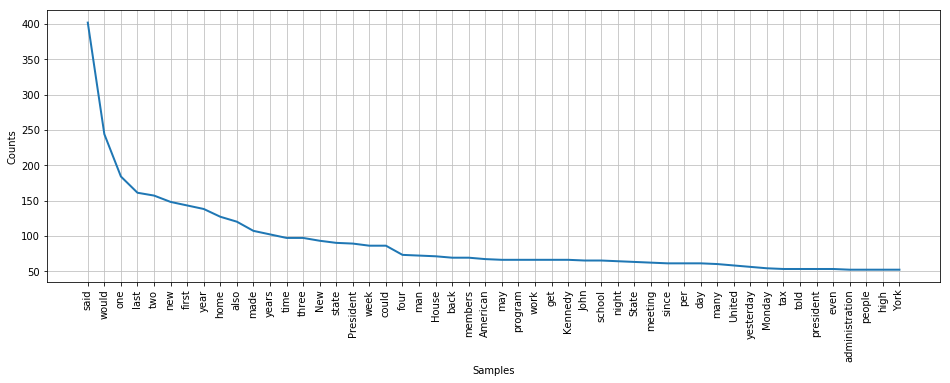

religion


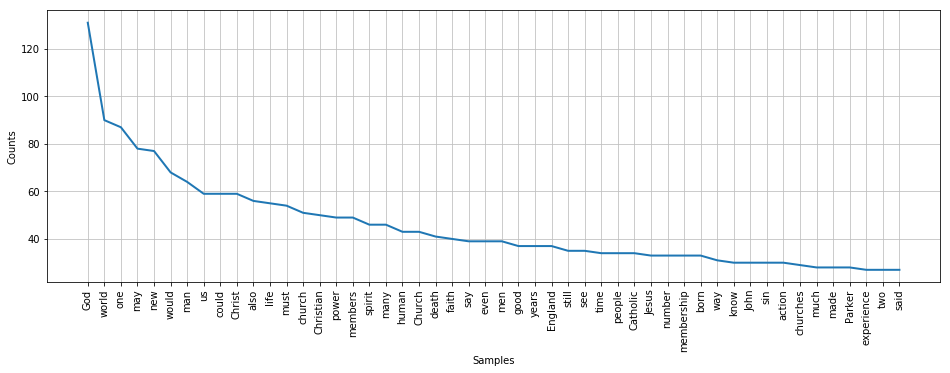

reviews


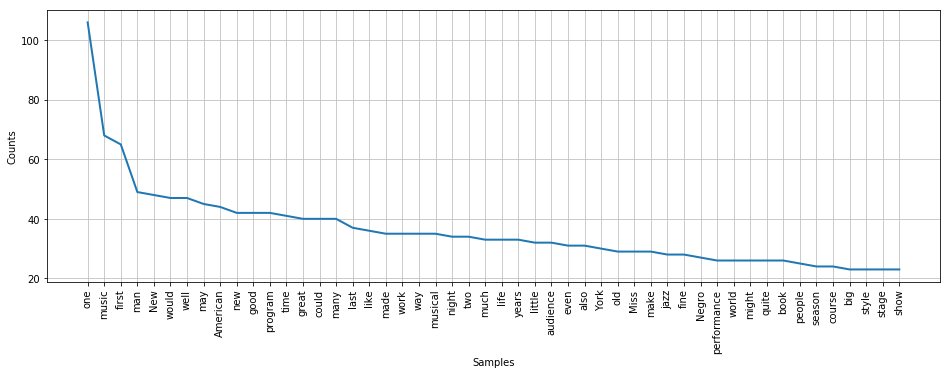

romance


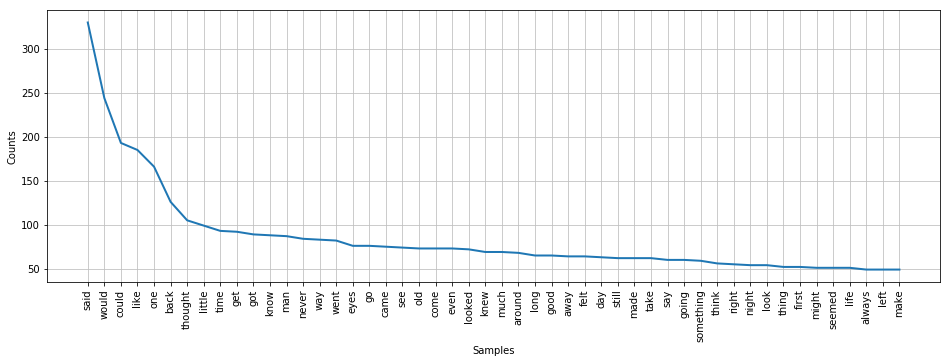

science_fiction


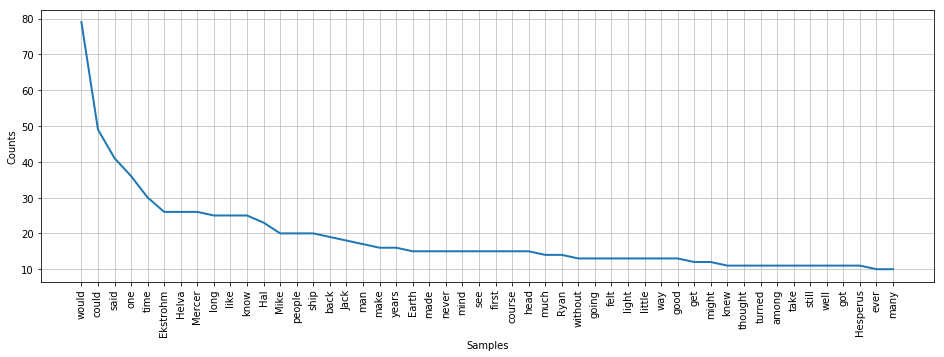

In [26]:
for corpus_category in brown.categories():
    print(corpus_category)
    words = [word for word in brown.words(categories=corpus_category) if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,5))
    freqdist.plot(50)

___


## 4. Lexical Diversity Plot

Lexical diversity is the percentage of unique words in the text corpus. For example, if there are 100 words in the corpus and there are only 20 unique words then lexical diversity is ```20/100 = 0.2```. 

Lexical diversity (LD) = Number of unique words / Number of words


In [27]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text), 2)


def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words



How does lexical diversity change if we look at all words and if we remove the stop words? Is that as you would expect? 

In [28]:
list_lex_div = []

for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    list_lex_div.append([genre , lex_div , lex_div_with_stop])
    
pd.DataFrame(list_lex_div, columns = ['Genre', 'LD (no stop words)', 'LD (with stop words)'])

,Genre,LD (no stop words),LD (with stop words)
0,adventure,0.26,0.13
1,belles_lettres,0.20,0.10
2,editorial,0.29,0.16
3,fiction,0.28,0.14
4,government,0.20,0.11
5,hobbies,0.25,0.13
6,humor,0.49,0.25
7,learned,0.16,0.09
8,lore,0.24,0.13
9,mystery,0.26,0.13


Let's see how the lexical diversity changes in the corpus. 

To visualise this we can divide a text corpus into small batches and calculate the diversity for that piece and plot it. 

We can split corpora by sentence, paragraph, chapter, etc, but for sake of simplicity we can consider a batch of 5000 words as a chunk and plot its lexical diversity. So x-axis is the batch offset and y-axis is the lexical diversity of that batch.

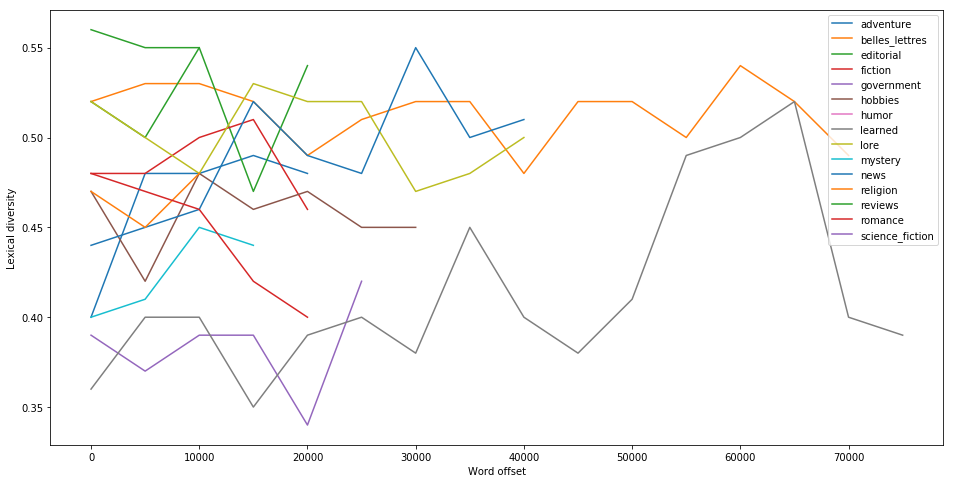

In [29]:
def lexical_array(corpus_category, 
                  interval=5000):
    
    words = get_brown_corpus_words(corpus_category)
    prev = 0
    result = []
    for i in range(0,len(words), interval):
        seg_words = words[prev:i]
        if len(seg_words) > 0:
            result.append(lexical_diversity(seg_words))
        prev = i
    
    return result

plt.figure(figsize=(16,8))

for cat in brown.categories():
    plot_array = lexical_array(cat)
    plt.plot(np.arange(0,len(plot_array))*5000,
             plot_array,
             label=cat)
    
plt.legend()
plt.xlabel('Word offset')
plt.ylabel('Lexical diversity')
plt.show()

Some genre of text starts with less diversity and diversity increases as the corpus offset increases. For other genres, the lexical distribution remains high throughout.

___

## 5. Word Length Distribution Plots

This plot shows the word length on the x-axis vs the number of words of that length on the y-axis. This plot helps to visualise the composition of different word length in the text corpus. 

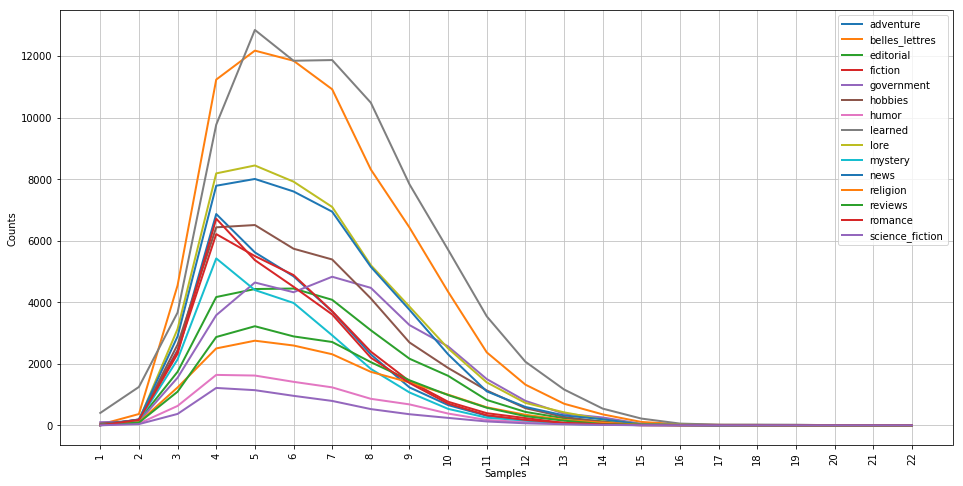

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

____


## 6. N-gram Distribution Plot

N-grams are the continuous sequences of ```n``` words that occur very often. For example, if we look at ```n=2```, we are looking for 2 words that occur very often together like New York, butter milk, etc. 

These pairs of words are also called bigrams, groups of 3 words (or ```n=3```) are called trigrams and so on. 

N-gram distribution plot allows you to visualise the distribution of n-grams for different values of n. Here, we consider n from 1 to 5. 

In [ ]:
from nltk.util import ngrams
plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)

plt.legend()
plt.show()